In [1]:
! pip install langgraph langsmith


In [2]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict, Annotated
from langgraph.graph.message import add_messages

In [3]:
from dotenv import load_dotenv
import os
load_dotenv()
os.getenv("LANGCHAIN_API_KEY")


'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'

In [4]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model="gpt-3.5-turbo")


In [5]:
llm.invoke("Hellow").content


'Hello! How can I assist you today?'

In [6]:
class State(TypedDict):
    messages :Annotated[list,add_messages]

graph_builder = StateGraph(State)

In [7]:
def Biva(state):
    return {"messages": [llm.invoke(state["messages"])]}


graph_builder.add_node("Biva", Biva)  # one is a label, the other is the function that powers that label.
graph_builder.add_edge(START, "Biva")   # connect the start node to the Biva node
graph_builder.add_edge("Biva", END)  # connect the Biva node to the end node
graph = graph_builder.compile()

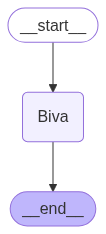

In [8]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [9]:
def Sweety(state):
    user_text = {"messages" : [{"role": "user","content":"who is your best friend? "}]}

    for updates in graph.stream(user_text):

        for node_output in updates.values():
         last_msg = node_output["messages"][-1]
         print("Assistant:", last_msg.content)

print('type "exit" to stop the conversation.')    
while True:
    text = input("User: ").strip()

    # Leave the loop if the user asked to quit
    if text.lower() in {"quit", "exit", "q"}:
        print("Goodbye!")
        break

    # Send the message through the graph
    Sweety(text)       


type "exit" to stop the conversation.
Assistant: I am an AI assistant and do not have personal relationships like humans do.
Goodbye!
